<a href="https://colab.research.google.com/github/DCunoUCF/cap4630/blob/master/HW_2_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#David Cuno
#Professor Wocjan
#CAP 4630
#11/12/19

# Problem 2
Modify the network architecture in the notebook for classifying MNIST fashion items with dense layers and analyzing model performance by varying the number of hidden layers and choosing different sizes for the hidden layers.

Give three models consisting of only dense layers that

    first model underfits (the model is too simple and cannot explain the data)
    second model overfits (the model is unnecessarily complex so it can easily adapt too much to the training data)
    third is pretty good (the model is either too simple, nor too complex; you don't train for too many epochs; you use dropout to fight overfitting)

Make sure that you plot the curves depicting the training/validation accuracy/loss.

In [0]:
# example: history = model.fit
# use wocjan notebook code
# underfit means the model is "less complicated" than the model that works. model too simple. not trained enough?
# overfit => significant gap between training accuracy and validation accuracy??? training too much, over optimize

# dense layers



# UNDERFIT

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 1)                 785       
_________________________________________________________________
dense_85 (Dense)             (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/step - loss: 2.0774 - acc: 0.1764 - val_loss: 1.9553 - val_acc: 0.2217
Epoch 2/30
60000/60000 [==============================] - 1s 17us/step - loss: 1.9319 - acc: 0.2313 - val_loss: 1.8732 - val_acc: 0.2424
Epoch 3/30
60000/60000 [==============================] - 1s 15us/step - loss: 1.8664 - acc: 0.2489 - val_loss: 1.8161 - val_acc: 0.2527
Epoch 4/30
60000/60000 [==============================] 

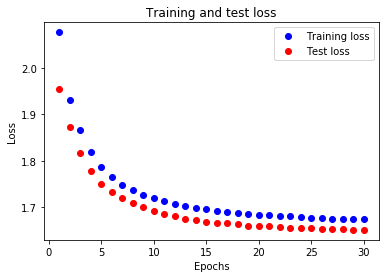

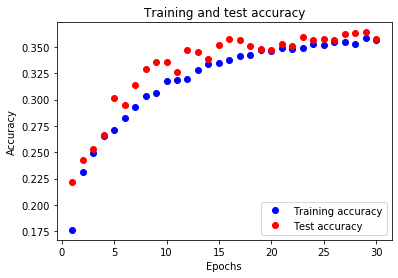

In [39]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import math as m
import time
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

network = models.Sequential()
network.add(layers.Dense(1, activation='relu', input_shape=(28 * 28,))) # default was 512
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 30 # default was 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# OVERFIT

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_87 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_88 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_89 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_90 (Dense)             (None, 10)                10250     
Total params: 800,650
Trainable params: 800,650
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 2

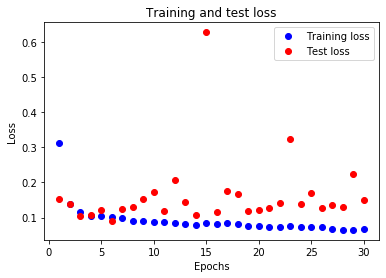

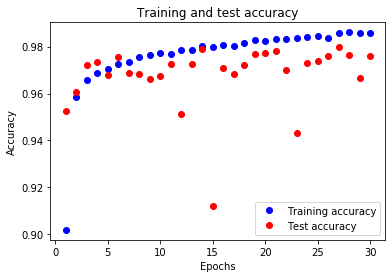

In [40]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import math as m
import time
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,))) # lots
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,))) # of
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # layers
network.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,))) # default was 512 only
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 30 # default was 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# PRETTY GOOD

4423680/4422102 [==============================] - 0s 0us/step


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 9s 145us/step - loss: 0.3653 - acc: 0.8906 - val_loss: 0.1679 - val_acc: 0.9476
Epoch 2/40
60000/60000 [==============================] - 6s 103us/step - loss: 0.1973 - acc: 0.9415 - val_loss: 0.1222 - val_acc: 0.9611
Epoch 3/40
60000/60000 [===========================

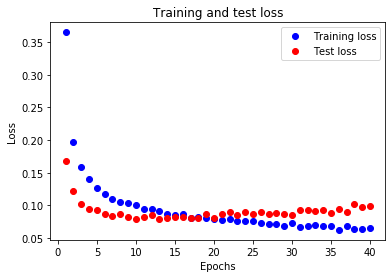

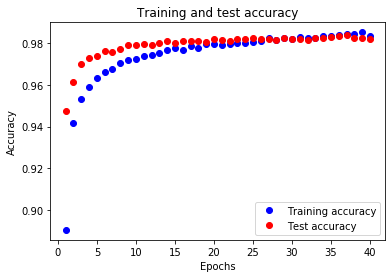

In [38]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import math as m
import time
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # default was 512
network.add(layers.Dropout(0.66)) # dropout to control for overfitting
network.add(layers.Dense(10, activation='softmax'))
network.summary()

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 40 # default was 50
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
